<a href="https://colab.research.google.com/github/NileshCT/Zomato_Restaurant_EDA/blob/main/Flask_Predict_Zomato_Restaurant_Rating_by_NileshThonte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
#This module contains an automatically-generated hierarchy of Python classes which represent non-leaf nodes in a figure schema.
import plotly.offline as py
#you can use the plot function from plotly.offline to generate an HTML file of a plot that can be viewed locally1.
import seaborn as sns

import matplotlib.ticker as mtick
#This module contains classes for configuring tick locating and formatting in matplotlib plots.
plt.style.use("fivethirtyeight")
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) 
#on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
#Importing dataset
df=pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [ ]:
#Exploring top five records
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
#exploring last five records
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [ ]:
#Exporing shape of dataframe
df.shape

(51717, 17)

In [ ]:
#Exporing datatypes
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
#Exporing infomation of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
#Exploring stastical information
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
#checking null values.
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
data=df.copy()

In [ ]:
#Dropping unwanted columns.
data=df.drop(["url","phone"],axis=1)
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
#Checking duplicated data
data.duplicated().sum()

43

In [ ]:
#Dropping duplicated records from dataframe.
data.drop_duplicates(inplace=True)

In [ ]:
# Treating null values.dropping null values
data.dropna(how="any",inplace=True)

In [ ]:
#Checking null values after dropping null values
data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#Renaming the some of the column name from dataframe.
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data1=data.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"})

In [ ]:
#Checking renamed columns after renmaing 
data1.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
#Cleaning dataframe.
data1["cost"].unique()
#Here in this cost feature is given in the object nature and 
#we need to convert it into the int/float type and also we need to remove the , from the number for that need to use lambda function.

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
#By using lambda function.
data1["cost"]=data1["cost"].apply(lambda x:x.replace(",",""))


In [ ]:
data1["cost"]=data1["cost"].astype(float)

In [ ]:
#chacking after replacement
data1["cost"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [ ]:
#Checking after converting cost to float
data1.dtypes

address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [ ]:
#Exploring rate feature.
data1["rate"].unique()
#here in this feature there is unwanted stuff is there like new word and /5 so we need to remove it.

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing new word from rate feature.
data1=data1.loc[data1.rate!="NEW"]

In [ ]:
#Removing /5 from rate feature.
data1["rate"]=data1["rate"].apply(lambda x:x.replace("/5",""))

In [ ]:
#checking after process
data1["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

**Visualization**

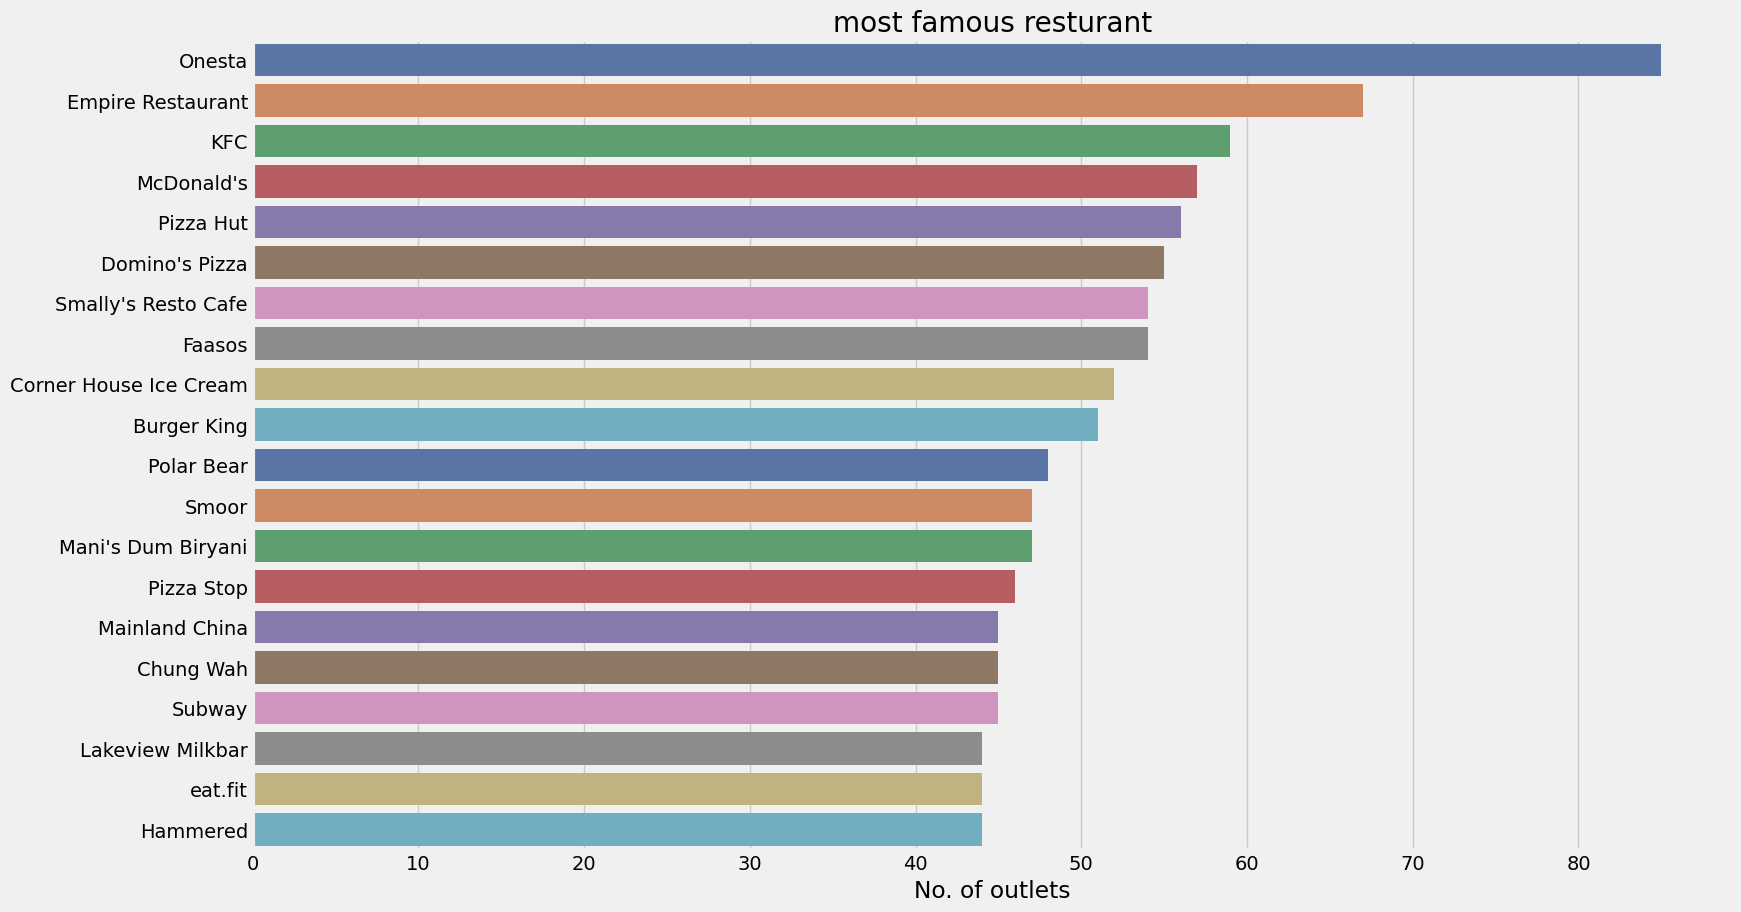

In [ ]:
plt.figure(figsize=(17,10))
chains=data1["name"].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="deep")
# The palette argument specifies the color palette to be used for the plot.
#chains.index refers to the index of the chains object. In Python, the index of an object is a way to label the rows of a data structure, such as a DataFrame or Series.
plt.title("most famous resturant")
plt.xlabel("No. of outlets")
plt.show()

**Here onstra and Empire restaurant are most famous restaurant.**

In [ ]:
#pie plot for the number of booking _tables or not
x=data1["book_table"].value_counts()
colors=["#800080","#0000A0"]
trace=go.Pie(labels=x.index,values=x,textinfo="value",marker=dict(colors=colors,line=dict(color="#001000",width=2)))
#The textinfo argument specifies what information should be displayed on the chart.
#In this case, it is set to "value", which means that the values will be displayed on the chart.
#The marker argument is used to customize the appearance of the chart. In this case, it is set to a dictionary with two keys: color and width
layout=go.Layout(title="table_booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig,filename="pie_chart_subplots")

**Book_table is showing hightest weightage around 74% booked there table.**

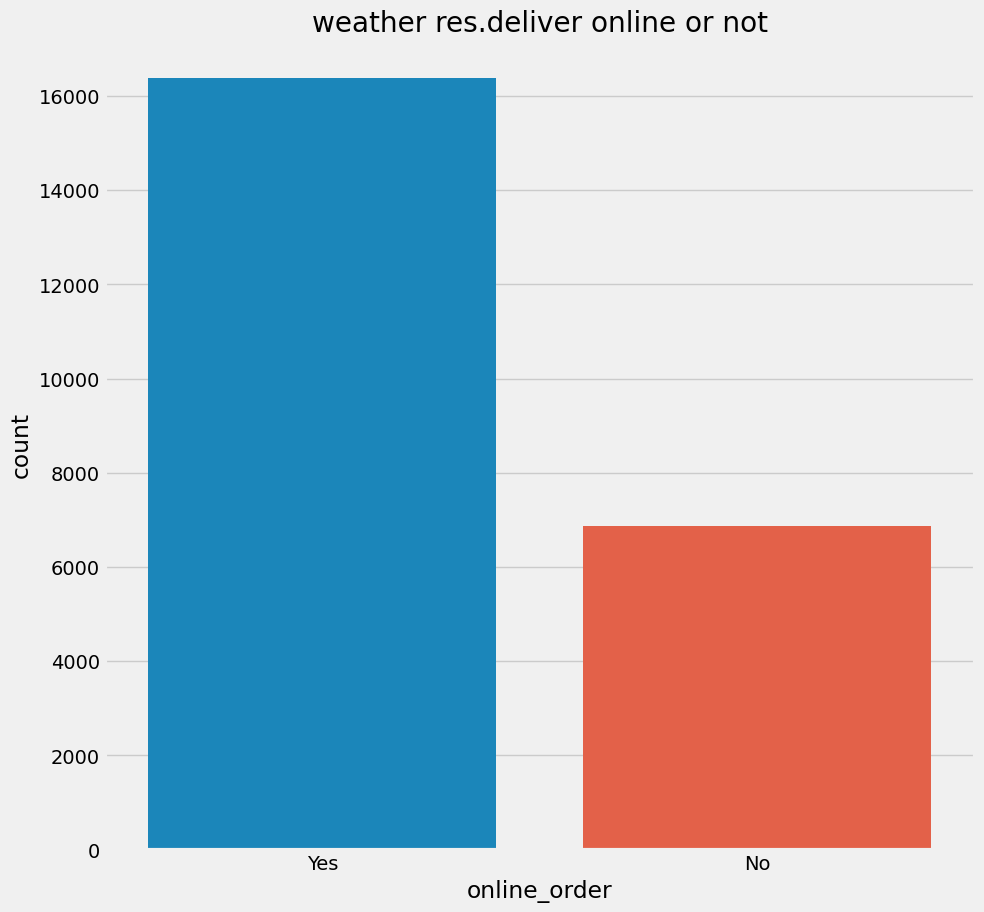

In [ ]:
# Weather restorant deliver online or not.
sns.countplot(x=data1["online_order"])
fig=plt.gcf()
#The plt.gcf() function returns the current figure.
fig.set_size_inches(10,10)
plt.title("weather res.deliver online or not")
plt.show()

**Most of the restaurant give online service to deliver online food.Around 16000 saying yes**

<Axes: xlabel='rate', ylabel='Density'>

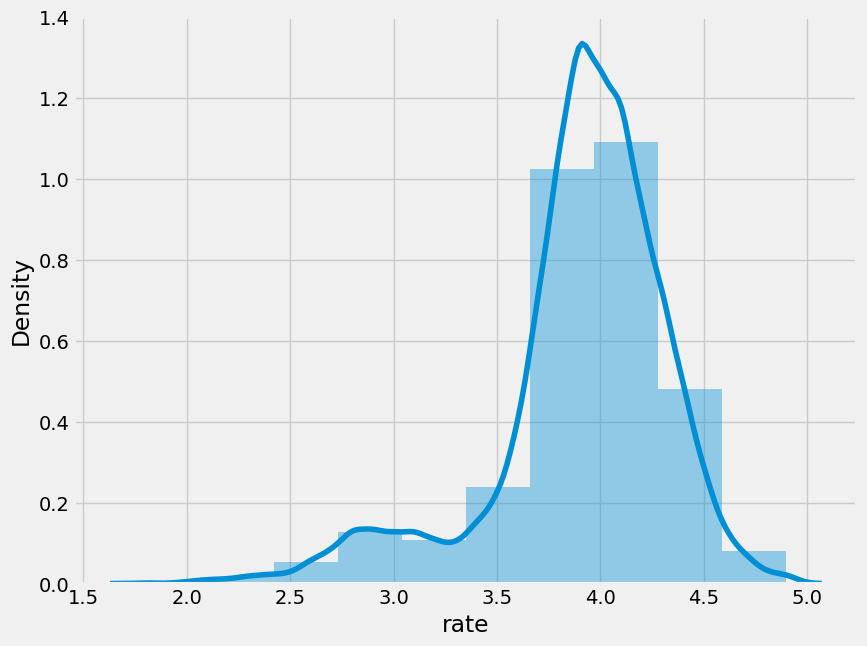

In [ ]:
#plot to show online _order service using visually.
#Rating distribution.
plt.figure(figsize=(9,7))
sns.distplot(data1["rate"],bins=10)

**Here most of the res is having rating between 3.5 to 4.5.**

In [ ]:
#Count of rating as between 1&2,2&3,3&4 & >4.
data1["rate"].min() # most mjn() rating for any res.

'1.8'

In [ ]:
data1["rate"].max() # most max() rating for any res.

'4.9 '

In [ ]:
data1["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [ ]:
#Converting object dtype into float dtype.
data1["rate"]=data1["rate"].astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23248 non-null  object 
 1   name          23248 non-null  object 
 2   online_order  23248 non-null  object 
 3   book_table    23248 non-null  object 
 4   rate          23248 non-null  float64
 5   votes         23248 non-null  int64  
 6   location      23248 non-null  object 
 7   rest_type     23248 non-null  object 
 8   dish_liked    23248 non-null  object 
 9   cuisines      23248 non-null  object 
 10  cost          23248 non-null  float64
 11  reviews_list  23248 non-null  object 
 12  menu_item     23248 non-null  object 
 13  type          23248 non-null  object 
 14  city          23248 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.8+ MB


In [ ]:
#Count of rating between 1 to 2. and there are 23248 records are there that showing the 1 to 2 rating.
((data1["rate"]>=1) & (data1["rate"]<2)).sum()

5

In [ ]:
#Count of rating between 2 to 3. 
((data1["rate"]>=2) & (data1["rate"]<3)).sum()

1179

In [ ]:
#Count of rating between 3 to 4.
((data1["rate"]>=3) & (data1["rate"]<4)).sum()

10153

In [ ]:
#Count of rating between 1 to 2. and there are 23248 records are there that showing the 1 to 2 rating.
(data1["rate"]>=4).sum()

11911

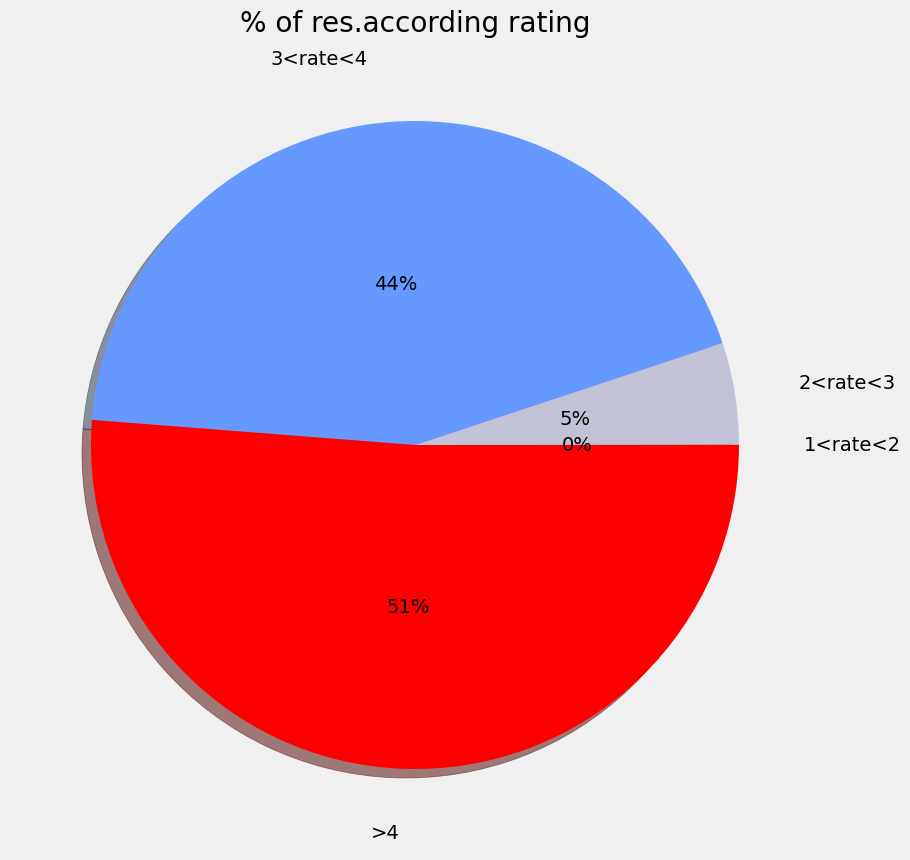

In [ ]:
#plotting dist. of rating using pie plot.
slices=[((data1["rate"]>=1) & (data1["rate"]<2)).sum(),((data1["rate"]>=2) & (data1["rate"]<3)).sum(),((data1["rate"]>=3) & (data1["rate"]<4)).sum(),(data1["rate"]>=4).sum()]

labels=["1<rate<2","2<rate<3","3<rate<4",">4"]
colors=["#FF0000FF","#c2c2d6","#6699ff"]
plt.pie(slices,colors=colors,labels=labels,autopct='%1.0f%%',pctdistance=.5,labeldistance=1.2,shadow=True)

fig=plt.gcf()
plt.title("% of res.according rating")

fig.set_size_inches(10,10)
plt.show()

In [ ]:
data1["type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data1["type"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


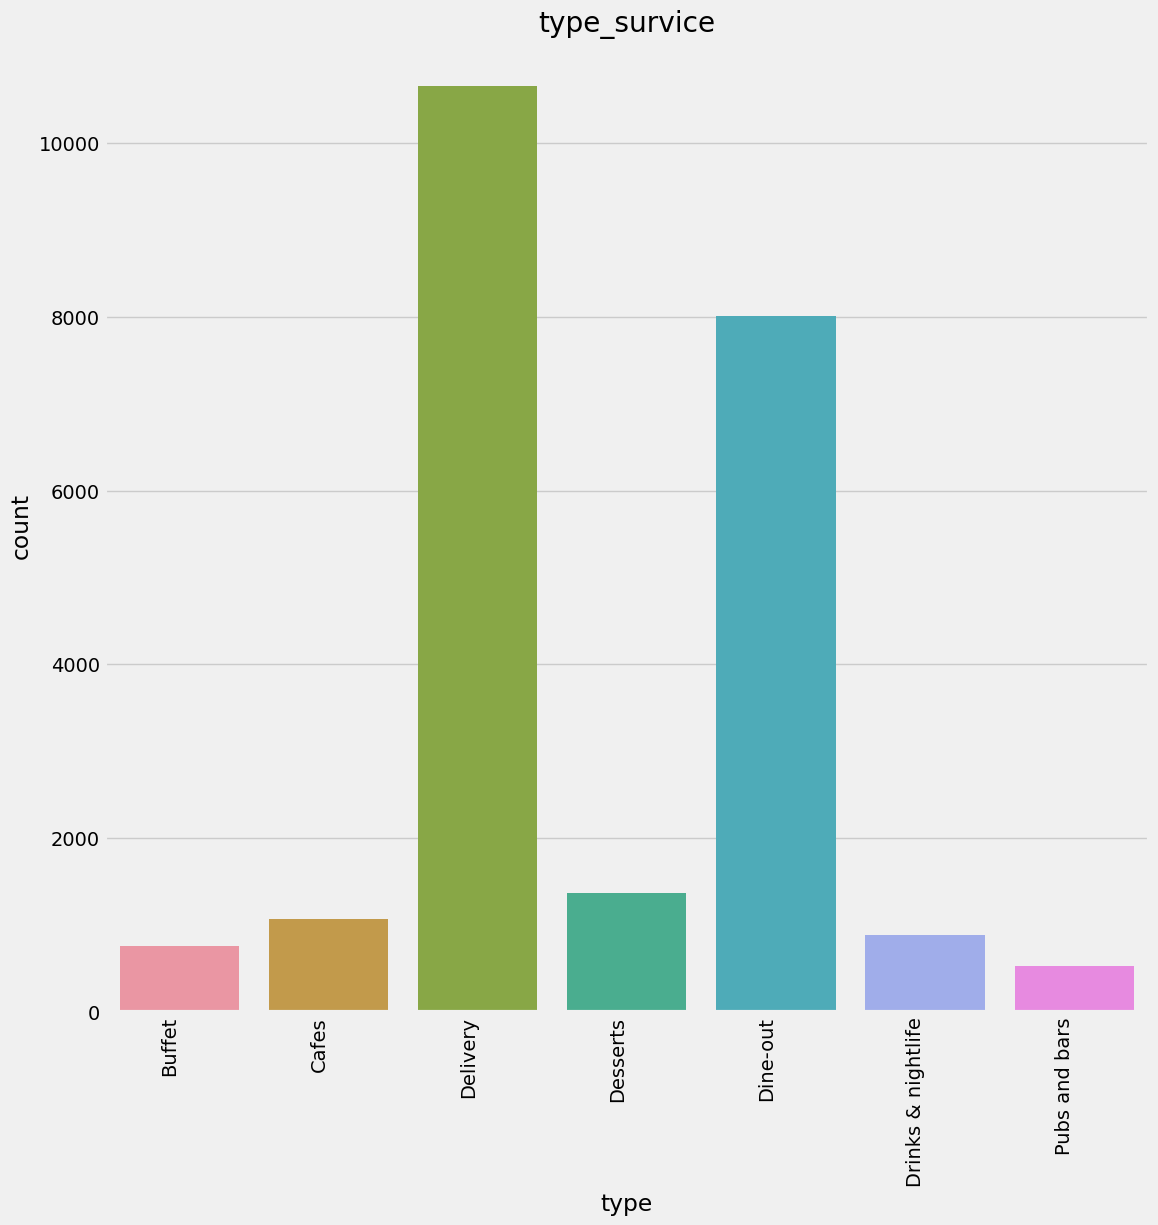

In [ ]:
#Service type
ax = sns.countplot(x=data1["type"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title("type_survice")
plt.show()

In [ ]:
#Distribution of cost of food for two people.
from plotly.offline import iplot

In [ ]:
trace0=go.Box(y=data1["cost"],name="accepting online order",marker=dict(color= 'rgb(113,10,100)',))
data=[trace0]
layout=go.Layout(title="Box plot of approx cost",width=800,height=800,yaxis=dict(title="price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)


In [ ]:
#Most liked dishes
import re
data1.index=range(data1.shape[0])
likes=[]
for i in range (data1.shape[0]):
  array_split=re.split(",",data1["dish_liked"][i])
  for item in array_split:
    likes.append(item)
    
# print("most liked dish")
#This code imports the re module, which provides regular expression matching operations. 
# It then sets the index of the data1 DataFrame to be a range of integers from 0 to the number of rows in the DataFrame. 
# An empty list called likes is created. The code then enters a loop that iterates over each row in the data1 DataFrame. 
# For each row, the value in the "dish_liked" column is split into an array of substrings using the re.split function with a delimiter of ",". 
# Each substring is then appended to the likes list. After the loop has completed, 
# the index of the data1 DataFrame is reset to be a range of integers from 0 to the number of rows in the DataFrame again. 
# The index of the DataFrame is then printed. Finally, the string "most liked dish" is printed.


In [ ]:
data1.index=range(data1.shape[0])

In [ ]:
data1.index

RangeIndex(start=0, stop=23248, step=1)

In [ ]:
fav_food=pd.Series(likes).value_counts()

In [ ]:
fav_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

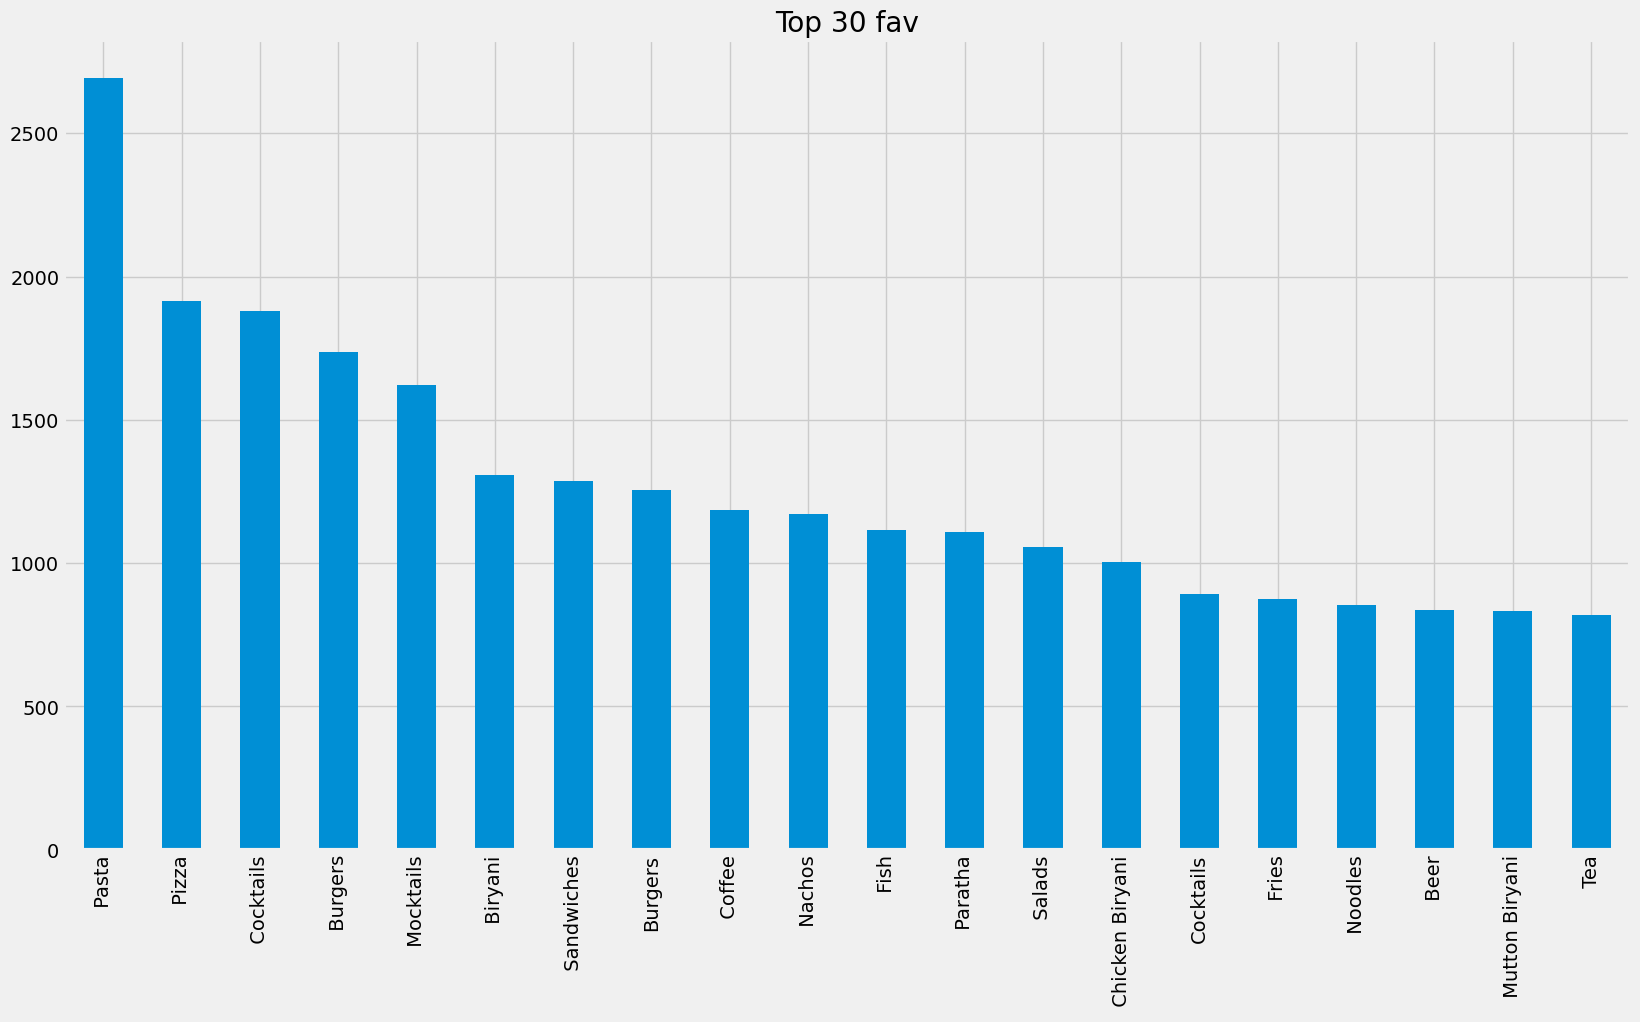

In [ ]:
ax=fav_food.nlargest(n=20,keep="first").plot(kind="bar",figsize=(18,10),title="Top 30 fav")
#The code you provided selects the top 20 rows from the fav_food DataFrame based on the largest values in the column specified by the ax variable. 
#fav_food.nlargest(n=20, keep="first") is a method of a pandas DataFrame that returns the first 20 rows 
# with the largest values in the column specified by the ax variable. 
# The keep parameter specifies which duplicate values to keep. 
# In this case, it is set to "first", which means that 
# if there are duplicate values among the top 20 largest values, only the first occurrence of each value will be kept in the resulting DataFrame.

**Pasta is the most fav_food while pizza is second largest and tea is list prefered.**

In [ ]:
for i in ax.patches:
  ax.annotate(str(i.get_height()),(i.get_x()*1.005,i.get_height()*1.005))

Text(0.5, 0, 'count')

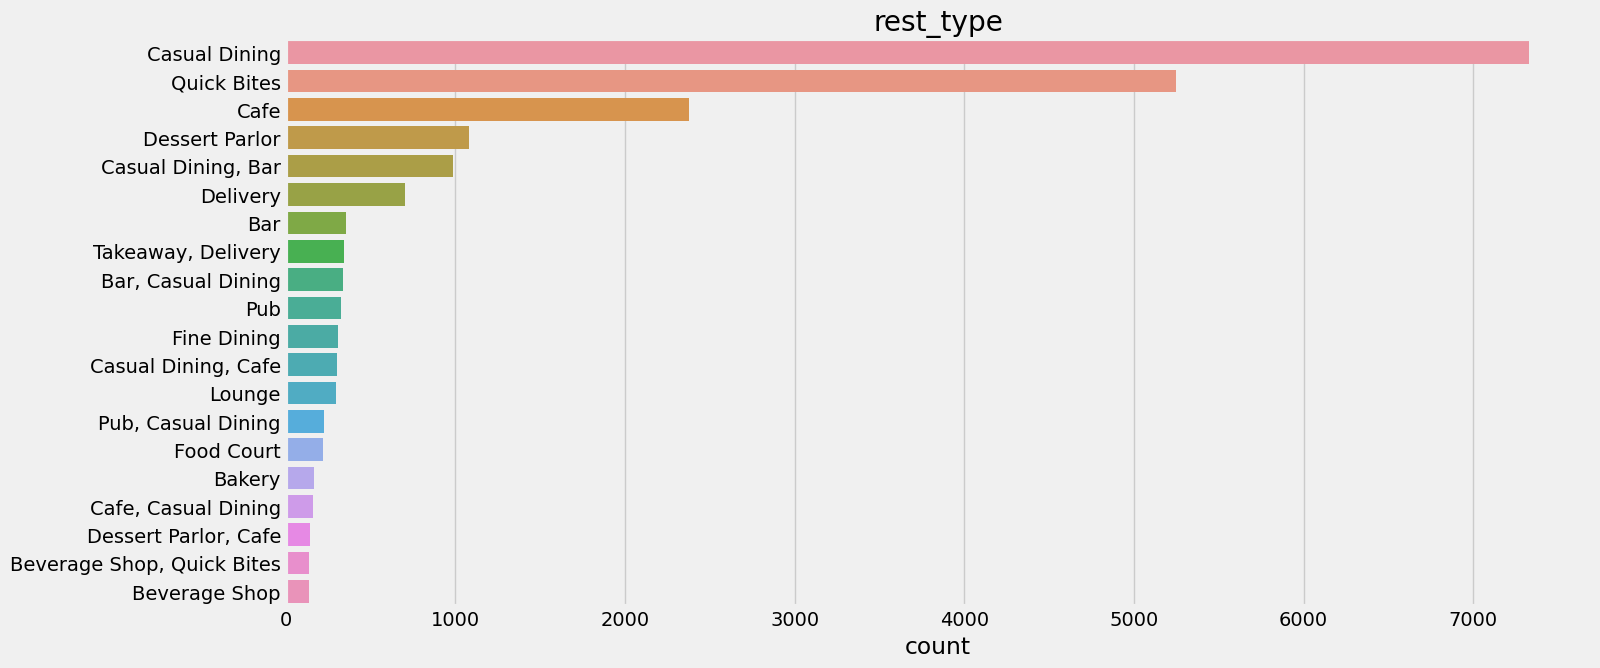

In [ ]:
#res and there count
plt.figure(figsize=(15,7))
rest=data1["rest_type"].value_counts()[:20]
sns.barplot(x=rest,y=rest.index)
plt.title("rest_type")
plt.xlabel("count")

Text(0.5, 0, 'no of outlets')

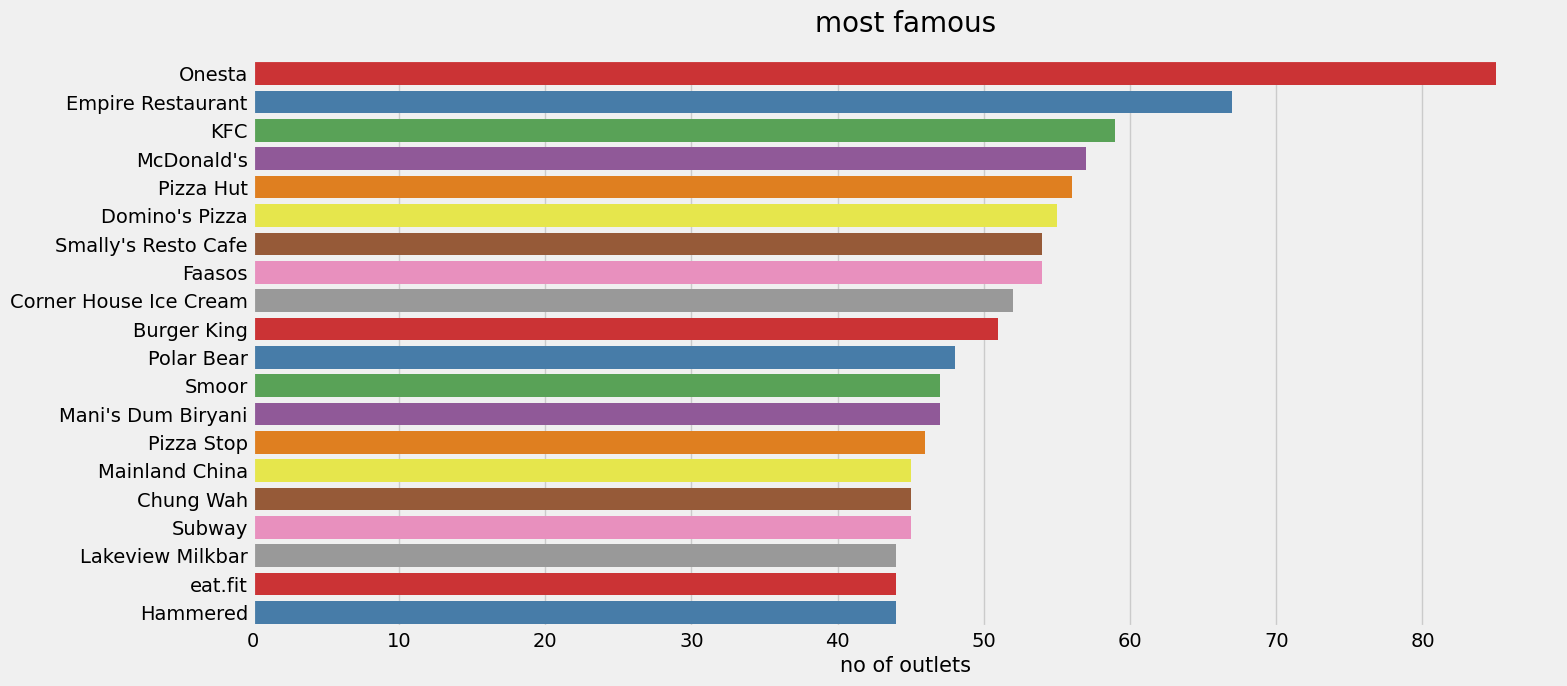

In [ ]:
#Most famous rest.
plt.figure(figsize=(15,7))
chains=data1["name"].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette="Set1")
plt.title("most famous",size=20,pad=20)
plt.xlabel("no of outlets",size=15)

In [ ]:
#model buliding
#Converting oniline_order into numeric 
data1.online_order[data1.online_order=="Yes"]=1
data1.online_order[data1.online_order=="No"]=0
data1.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [ ]:
data1.online_order=pd.to_numeric(data1.online_order)

In [ ]:
data1.book_table[data1.book_table=="Yes"]=1
data1.book_table[data1.book_table=="No"]=0
data1.book_table.value_counts()
data1.book_table=pd.to_numeric(data1.book_table)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
data1.location=le.fit_transform(data1.location)

In [ ]:
data1.rest_type=le.fit_transform(data1.rest_type)

In [ ]:
data1.cuisines=le.fit_transform(data1.cuisines)

In [ ]:
data1.menu_item=le.fit_transform(data1.menu_item)

In [ ]:
#Model building
data1.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [ ]:
my_data1=data1.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data1.to_csv("zomato_data1.csv")

In [ ]:
X=data1.iloc[:,[2,3,5,6,7,9,10,12]]
y=data1["rate"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)


In [ ]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.22818828522967072

In [ ]:
#Randomforest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=0.0001)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.8809706960047533

In [ ]:
#Extratree regressor
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor(n_estimators=120)
et.fit(X_train,y_train)
y_pred=et.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9328943977234561

**Here Extratree regressor gave good r2score as compair to other two algorithms**


In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('Zomato_model_pkl', 'wb') as files:
    pickle.dump(et, files)